# Initialize inputs and outputs 

In [73]:
import numpy as np

s1 = np.array([[-1,1,-1],
               [1,1,-1],
               [-1,1,-1],
               [-1,1,-1],
               [-1,1,-1],
               [-1,1,-1],
               [-1,1,-1]])
t1 = np.array([[-1,1,1,1]])

s2 = np.array([[1,1,1],
               [1,-1,1],
               [-1,-1,1],
               [-1,1,-1],
               [1,-1,-1],
               [1,-1,-1],
               [1,1,1]])
t2 = np.array([[1,-1,1,1]])

s3 = np.array([[1,1,-1],
               [-1,-1,1],
               [-1,-1,1],
               [1,1,1],
               [-1,-1,1],
               [-1,-1,1],
               [1,1,-1]])
t3 = np.array([[1,1,-1,1]])

s4 = np.array([[1,-1,1],
               [1,-1,1],
               [1,-1,1],
               [1,1,1],
               [-1,-1,1],
               [-1,-1,1],
               [-1,-1,1]])
t4 = np.array([[1,1,1,-1]])

S = (s1,s2,s3,s4)
T = (t1,t2,t3,t4)

In [74]:
def depict_array(matrix):
  for i in matrix:
      for j in i:
        if j == 1:
          print('#', end="")
        elif j == -1:
          print(".", end="")
        else:
          print(" ", end="")
      print("\r")

In [75]:
for mat in S:
  depict_array(mat)
  print('\n')

.#.
##.
.#.
.#.
.#.
.#.
.#.


###
#.#
..#
.#.
#..
#..
###


##.
..#
..#
###
..#
..#
##.


#.#
#.#
#.#
###
..#
..#
..#




# Weight
calculating weight and defining functions

In [76]:
def calc_weight(inputs, outputs):
  s = []
  t = []
  input_shape = inputs[0].shape
  output_shape = outputs[0].shape
  n = np.prod(input_shape)
  m = np.prod(output_shape)

  for i in range(len(inputs)):
    s.append(inputs[i].reshape((n,1)))
    t.append(outputs[i].reshape((1,m)))

  W = np.zeros((n, m))
  for i in range(len(inputs)):
    W += s[i].dot(t[i])

  return W

In [77]:
weight = calc_weight(S,T)
weight

array([[ 4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.],
       [ 2., -2.,  2., -2.],
       [ 0.,  0.,  4.,  0.],
       [-4.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -4.],
       [-4.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.],
       [ 2.,  2., -2., -2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2., -2., -2.],
       [ 0., -4.,  0.,  0.],
       [-4.,  0.,  0.,  0.],
       [ 2.,  2., -2., -2.],
       [ 0., -4.,  0.,  0.],
       [-4.,  0.,  0.,  0.],
       [ 2.,  2., -2., -2.],
       [ 2., -2., -2.,  2.],
       [ 0.,  0.,  0.,  4.],
       [ 2., -2.,  2., -2.]])

# Check
check if weight yields Ss and Ts

In [78]:
def activation(mat, theta=0):
  return np.where(mat > theta, 1., np.where(mat< theta, -1, 0))

def prediction(input, weight, output_shape):
  input_shape = np.prod(input.shape)
  pred = input.reshape((1,input_shape)).dot(weight)
  pred = pred.reshape(output_shape)
  pred = activation(pred)
  return pred

In [79]:
for i in range(len(S)):
  print(prediction(S[i], weight, (1,4)))

[[-1.  1.  1.  1.]]
[[ 1. -1.  1.  1.]]
[[ 1.  1. -1.  1.]]
[[ 1.  1.  1. -1.]]


In [80]:
for i in range(len(S)):
  depict_array(prediction(T[i], weight.T, (7,3)))
  print('\n')

.#.
##.
.#.
.#.
.#.
.#.
.#.


###
#.#
..#
.#.
#..
#..
###


##.
..#
..#
###
..#
..#
##.


#.#
#.#
#.#
###
..#
..#
..#




# Noise
adding noise to Ss

In [81]:
import random 
from copy import deepcopy

def noisy(inputs, percentage):
  length = len(inputs)
  shape = inputs[0].shape
  shape_prd = np.prod(shape)
  lst = list(range(shape_prd))
  new_inputs = []
  for i in range(length):
    indx = random.sample(lst, int(shape_prd* percentage))
    in_ = deepcopy(inputs[i].reshape((shape_prd,)))
    in_[indx] = in_[indx] * -1
    new_inputs.append(in_.reshape(shape))
  return new_inputs

In [82]:
new_S_15 = noisy(S, 0.15)
for i in range(len(S)):
  depict_array(new_S_15[i])
  print('\n')

#..
.#.
.#.
.#.
.#.
.#.
.#.


###
###
#.#
.#.
##.
#..
###


#..
...
..#
###
..#
#.#
##.


..#
#.#
#.#
.##
...
..#
..#




In [83]:
new_S_40 = noisy(S, 0.4)
for i in range(len(S)):
  depict_array(new_S_40[i])
  print('\n')

##.
###
##.
..#
.##
...
...


###
...
#.#
.#.
##.
...
...


##.
...
#..
###
#..
#..
###


..#
#.#
#..
.#.
#.#
###
.##




# BAM
Bidirectional Associative Memory

In [84]:
from copy import deepcopy

def BAM(inputs, original_inputs, weight):
  input_shape = inputs[0].shape
  input_size = np.prod(input_shape)
  length = len(inputs)

  ins_0 = deepcopy(inputs)
  ins_1 = 0
  out_ = 0
  cnt = [0]*length

  for i in range(length):

    while True:

      out_ = prediction(ins_0[i],weight,(1,4))
      ins_1 = prediction(out_, weight.T, (7,3))

      if np.all(ins_0[i] == original_inputs[i]):
        cnt[i] = 1
        break
      elif np.all(ins_1 == ins_0[i]):
        break
      
      ins_0[i] = deepcopy(ins_1)
  
  return np.array(cnt)

# Accuracy

In [85]:
def acc(inputs, weight, prcnt, iteration):
  cnt = np.zeros((iteration, len(inputs)))
  cnt_ = 0
  for i in range(iteration):
    cnt_ = 0
    new_inputs = noisy(inputs, prcnt)
    cnt_ = BAM(new_inputs, inputs, weight)
    cnt[i] = cnt_

  ac = np.array([np.count_nonzero(cnt[:,0])/iteration,
        np.count_nonzero(cnt[:,1])/iteration,
        np.count_nonzero(cnt[:,2])/iteration,
        np.count_nonzero(cnt[:,3])/iteration])
  return ac

In [86]:
'accuracy with 15% noise', acc(S, weight, 0.15, 1000), 'accuracy with 40% noise', acc(S, weight, 0.4, 1000)*100

('accuracy with 15% noise',
 array([0.751, 1.   , 0.853, 0.608]),
 'accuracy with 40% noise',
 array([17.8, 21.1, 18.4, 11.3]))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = np.zeros((100,4))
for i in range(100):
  prcntg= acc(S, weight, i/100, 1000)
  data[i] = prcntg

data_frame = pd.DataFrame({'1':data[:,0],
                     '2':data[:,1],
                     '3':data[:,2],
                     '4':data[:,3]})

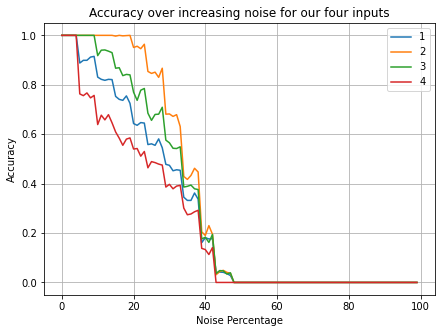

In [94]:
data_frame.plot(figsize=(7,5))
plt.xlabel('Noise Percentage'), plt.ylabel('Accuracy'), plt.title('Accuracy over increasing noise for our four inputs')
plt.grid()

# 4


In [88]:
def BAM_4(inputs, original_inputs, weight):

  ins_0 = deepcopy(inputs)
  ins_1 = 0
  out_ = 0
  cnt = 0

  while True:

    out_ = prediction(ins_0,weight.T, (7,3))
    ins_1 = prediction(out_, weight, (1,4))

    if np.all(ins_0 == original_inputs):
      cnt += 1
      break
    elif np.all(ins_1 == ins_0):
      break
      
    ins_0 = deepcopy(ins_1)

  if cnt ==1:
    return True

In [89]:
a = np.array([[-1,1,1,0]])
BAM_4(a, T[0],weight)

True

In [90]:
a.shape

(1, 4)

In [91]:
a = np.array([[-1,1,1,0]])
prediction(a, weight.T, (7,3))

array([[-1.,  0., -1.],
       [ 1.,  1., -1.],
       [ 0.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  0., -1.]])